![Enunciado do case](enunciado.jpg)

In [4]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px


In [5]:
# Importando banco de dados
vendas = pd.read_excel('varejo.xlsx')
vendas.head()


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [6]:
# Explorando dados
vendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [7]:
# Agrupando e entendo melhor a diferença dos dados
vendas.groupby('idcanalvenda').idcompra.nunique()


idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [8]:
# Substituindo valores da coluna idcanalvenda
vendas['idcanalvendas'] = vendas['idcanalvenda'].str.replace('APP', 'Aplicativo')
vendas.groupby('idcanalvendas').idcompra.nunique()


idcanalvendas
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [9]:
# Agrupando e entendendo valores de bandeira
vendas.groupby('bandeira').idcompra.nunique()


bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [10]:
# Agrupando e entendendo valores por nome do departamento
vendas.groupby('Nome_Departamento').idcompra.nunique()


Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [11]:
# Agrupando e entendendo valores por estado
vendas.groupby('estado').idcompra.nunique()


estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [12]:
# Removendo espaços entre as palavras da coluna nome departamento
vendas['Nome_Departamento'] = vendas['Nome_Departamento'].str.replace(' ', '_')
vendas.groupby('Nome_Departamento').idcompra.nunique()


Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [13]:
# Identificando dados Nulos
vendas[vendas['estado'].isnull()]


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,idcanalvendas
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804,Internet
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359,Internet
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691,Mobile
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024,Mobile
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121,Mobile
...,...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873,Aplicativo
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772,Mobile
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399,Aplicativo
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784,Mobile


In [14]:
# Eliminando as linhas com dados nulos
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()


<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
 9   idcanalvendas      79926 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.7+ MB


In [15]:
# Substituindo valores nulos do estado por MS, como o enunciado
vendas['estado'].fillna('MS', inplace=True)
vendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
 9   idcanalvendas      80228 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.1+ MB


In [16]:
# Substituindo os valores nulos de preço pela média de preço
media_preço = vendas['Preço'].mean()

vendas['Preço'].fillna(media_preço, inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
 9   idcanalvendas      80228 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.1+ MB


In [17]:
# Mediana de preço
mediana_preco = vendas['Preço'].median()
mediana_preco


532.448

In [18]:
# Descrição dos dados
vendas[['Preço', 'Preço_com_frete']].describe()


,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [19]:
# Filtros para categorizar os preços que são menores do que o preço com frete
preco_errado = vendas.query("Preço > Preço_com_frete")

vendas_correto = vendas.query("Preço < Preço_com_frete")
vendas_correto

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,idcanalvendas
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Mobile
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Mobile
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Mobile
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,Mobile
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,Mobile
...,...,...,...,...,...,...,...,...,...,...
80023,351250,Internet,B,2023-01-29,661.68,676.736,Telefones_e_Celulares,SP,11429,Internet
80069,362035,Mobile,A,2023-04-25,95.92,101.600,Beleza_e_Saude,SP,26,Mobile
80090,466615,Internet,B,2023-03-30,735.20,750.256,Telefones_e_Celulares,SP,3128,Internet
80104,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206,Aplicativo


In [20]:
# Descricão da nova base, com os preços corretos.
vendas_correto.describe()


,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [21]:
# Filtrando nome de departamento e estado
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == "
                     "'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [22]:
# Agrupamento de produtos mais vendidos, ordenado de maneira decrescente 
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(
    ascending=False).reset_index()


,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [23]:
# Média de preço por departamento 
round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg(
    "mean").sort_values(ascending=False).reset_index(), 2)


,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [24]:
# Agrupando por quantidade de compras por data
vendas_correto.groupby("Data").idcompra.nunique().sort_values(
    ascending=False).reset_index()

,Data,idcompra
0,2023-02-13,226
1,2023-01-20,218
2,2023-03-07,215
3,2023-03-30,214
4,2023-02-20,214
...,...,...
114,2023-02-15,162
115,2023-04-04,162
116,2023-02-25,161
117,2023-02-22,156


In [25]:
# Extração do mês e criação de nova coluna
vendas_correto["mes"] = vendas_correto["Data"].dt.month
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,idcanalvendas,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Mobile,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Mobile,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Mobile,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,Mobile,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,Mobile,2


In [26]:
# Contagem dos dados por mês
vendas_correto.groupby("mes").idcompra.nunique().sort_values(
    ascending=False).sort_index()


mes
1    5309
2    5138
3    5590
4    5454
Name: idcompra, dtype: int64

In [27]:
# Importando a nova base
cliente = pd.read_excel("cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [28]:
# Visualização tabela de vendas corrata
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,idcanalvendas,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Mobile,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Mobile,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Mobile,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,Mobile,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,Mobile,2


In [29]:
# Descrevendo a tabela cliente varejo
round(cliente[["idade", "renda"]].describe(), 2)


,idade,renda
count,26425.00,26425.00
mean,53.41,8241.47
std,20.70,3899.87
min,18.00,1500.00
25%,35.00,4859.00
50%,53.00,8234.00
75%,71.00,11629.00
max,89.00,15000.00


In [30]:
# Colhendo informações da tabela
cliente.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [31]:
# Alterando o tipo de dado de renda
cliente = cliente.astype({'renda': 'float'})
cliente.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [32]:
# integração de tabelas
vendas_cliente = vendas_correto.merge(cliente, how="left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,idcanalvendas,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Mobile,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Mobile,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Mobile,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Mobile,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Mobile,2,78,6596.0


In [33]:
# Média de renda por canal
agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg(
    "mean").sort_values(ascending=False).reset_index(), 2)
agg_idcanal_renda


,idcanalvenda,renda
0,APP,8429.45
1,Aplicativo,8243.93
2,Mobile,8222.72
3,Internet,8211.84


In [34]:
# Média de idade de clientes por bandeira
agg_bandeira_idade = round(vendas_cliente.groupby("bandeira")["idade"].agg(
    "mean").sort_values(ascending=False).reset_index(), 2)
agg_bandeira_idade 


,bandeira,idade
0,A,53.30
1,B,53.29


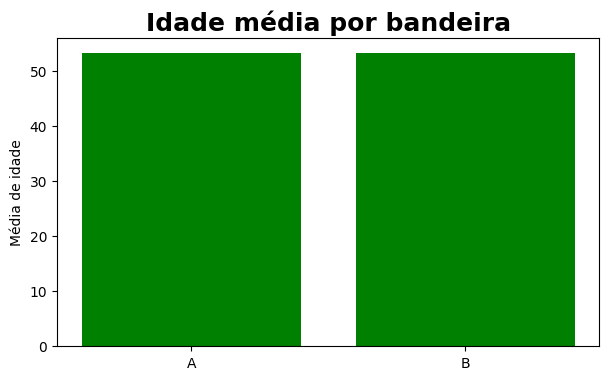

In [35]:
# Criando gráfico de idade média por bandeira
fig = plt.figure(figsize=(7, 4))

plt.bar(agg_bandeira_idade['bandeira'], agg_bandeira_idade['idade'],
        color='green')

plt.ylabel('Média de idade')

plt.title("Idade média por bandeira", loc="center", fontsize=18,
          fontweight="bold", color="black");


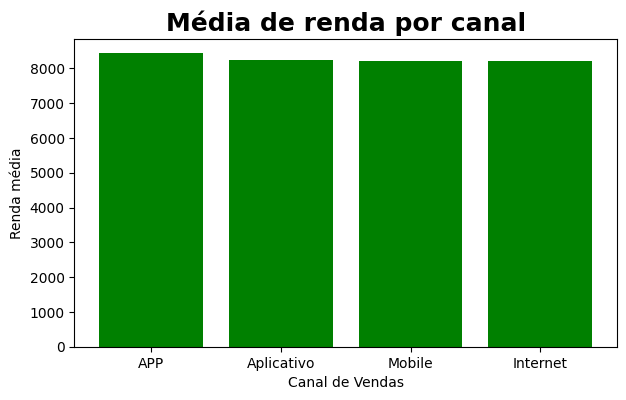

In [36]:
# Gráfico de barras, média de renda por canal
fig = plt.figure(figsize=(7, 4))

plt.bar(agg_idcanal_renda['idcanalvenda'], agg_idcanal_renda['renda'],
        color="green")

plt.xlabel("Canal de Vendas")
plt.ylabel("Renda média")

plt.title("Média de renda por canal", loc="center", fontsize=18, 
          fontweight="bold", color="black");

In [37]:
# Visualizando dados
venda_por_data = vendas_correto.groupby("Data").idcompra.nunique(
   ).reset_index()

venda_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


In [38]:
# Informação da tabela
venda_por_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      119 non-null    datetime64[ns]
 1   idcompra  119 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


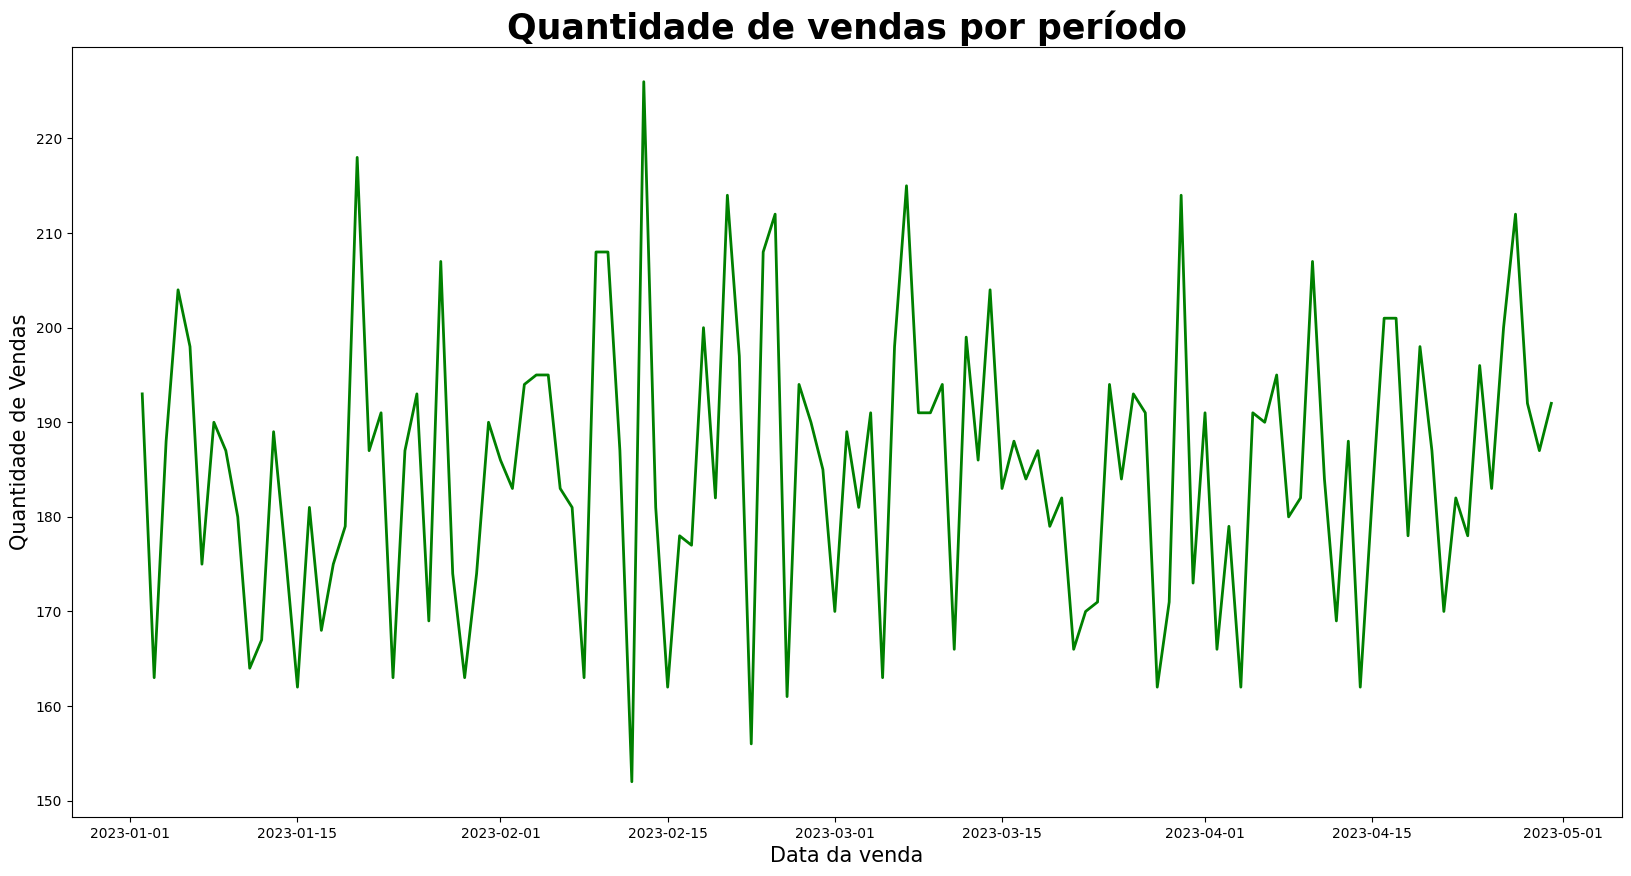

In [39]:
# Grágico de linha - vendas por período
fig = plt.figure(figsize=(20, 10))

plt.xlabel("Data da venda", fontsize=15)
plt.ylabel("Quantidade de Vendas", fontsize=15)
x = venda_por_data["Data"]
y = venda_por_data["idcompra"]

plt.title("Quantidade de vendas por período", loc="center", fontsize=25,
          fontweight="bold", color="black")

plt.plot(x, y, color="green", linewidth="2")
plt.show()

In [40]:
# Mostrando valores
agg_dept_preco = round(vendas_correto.groupby("Nome_Departamento")
                       ["Preço_com_frete"].agg("mean").sort_values(
                           ascending=False).reset_index(), 2)

agg_dept_preco.head()

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19


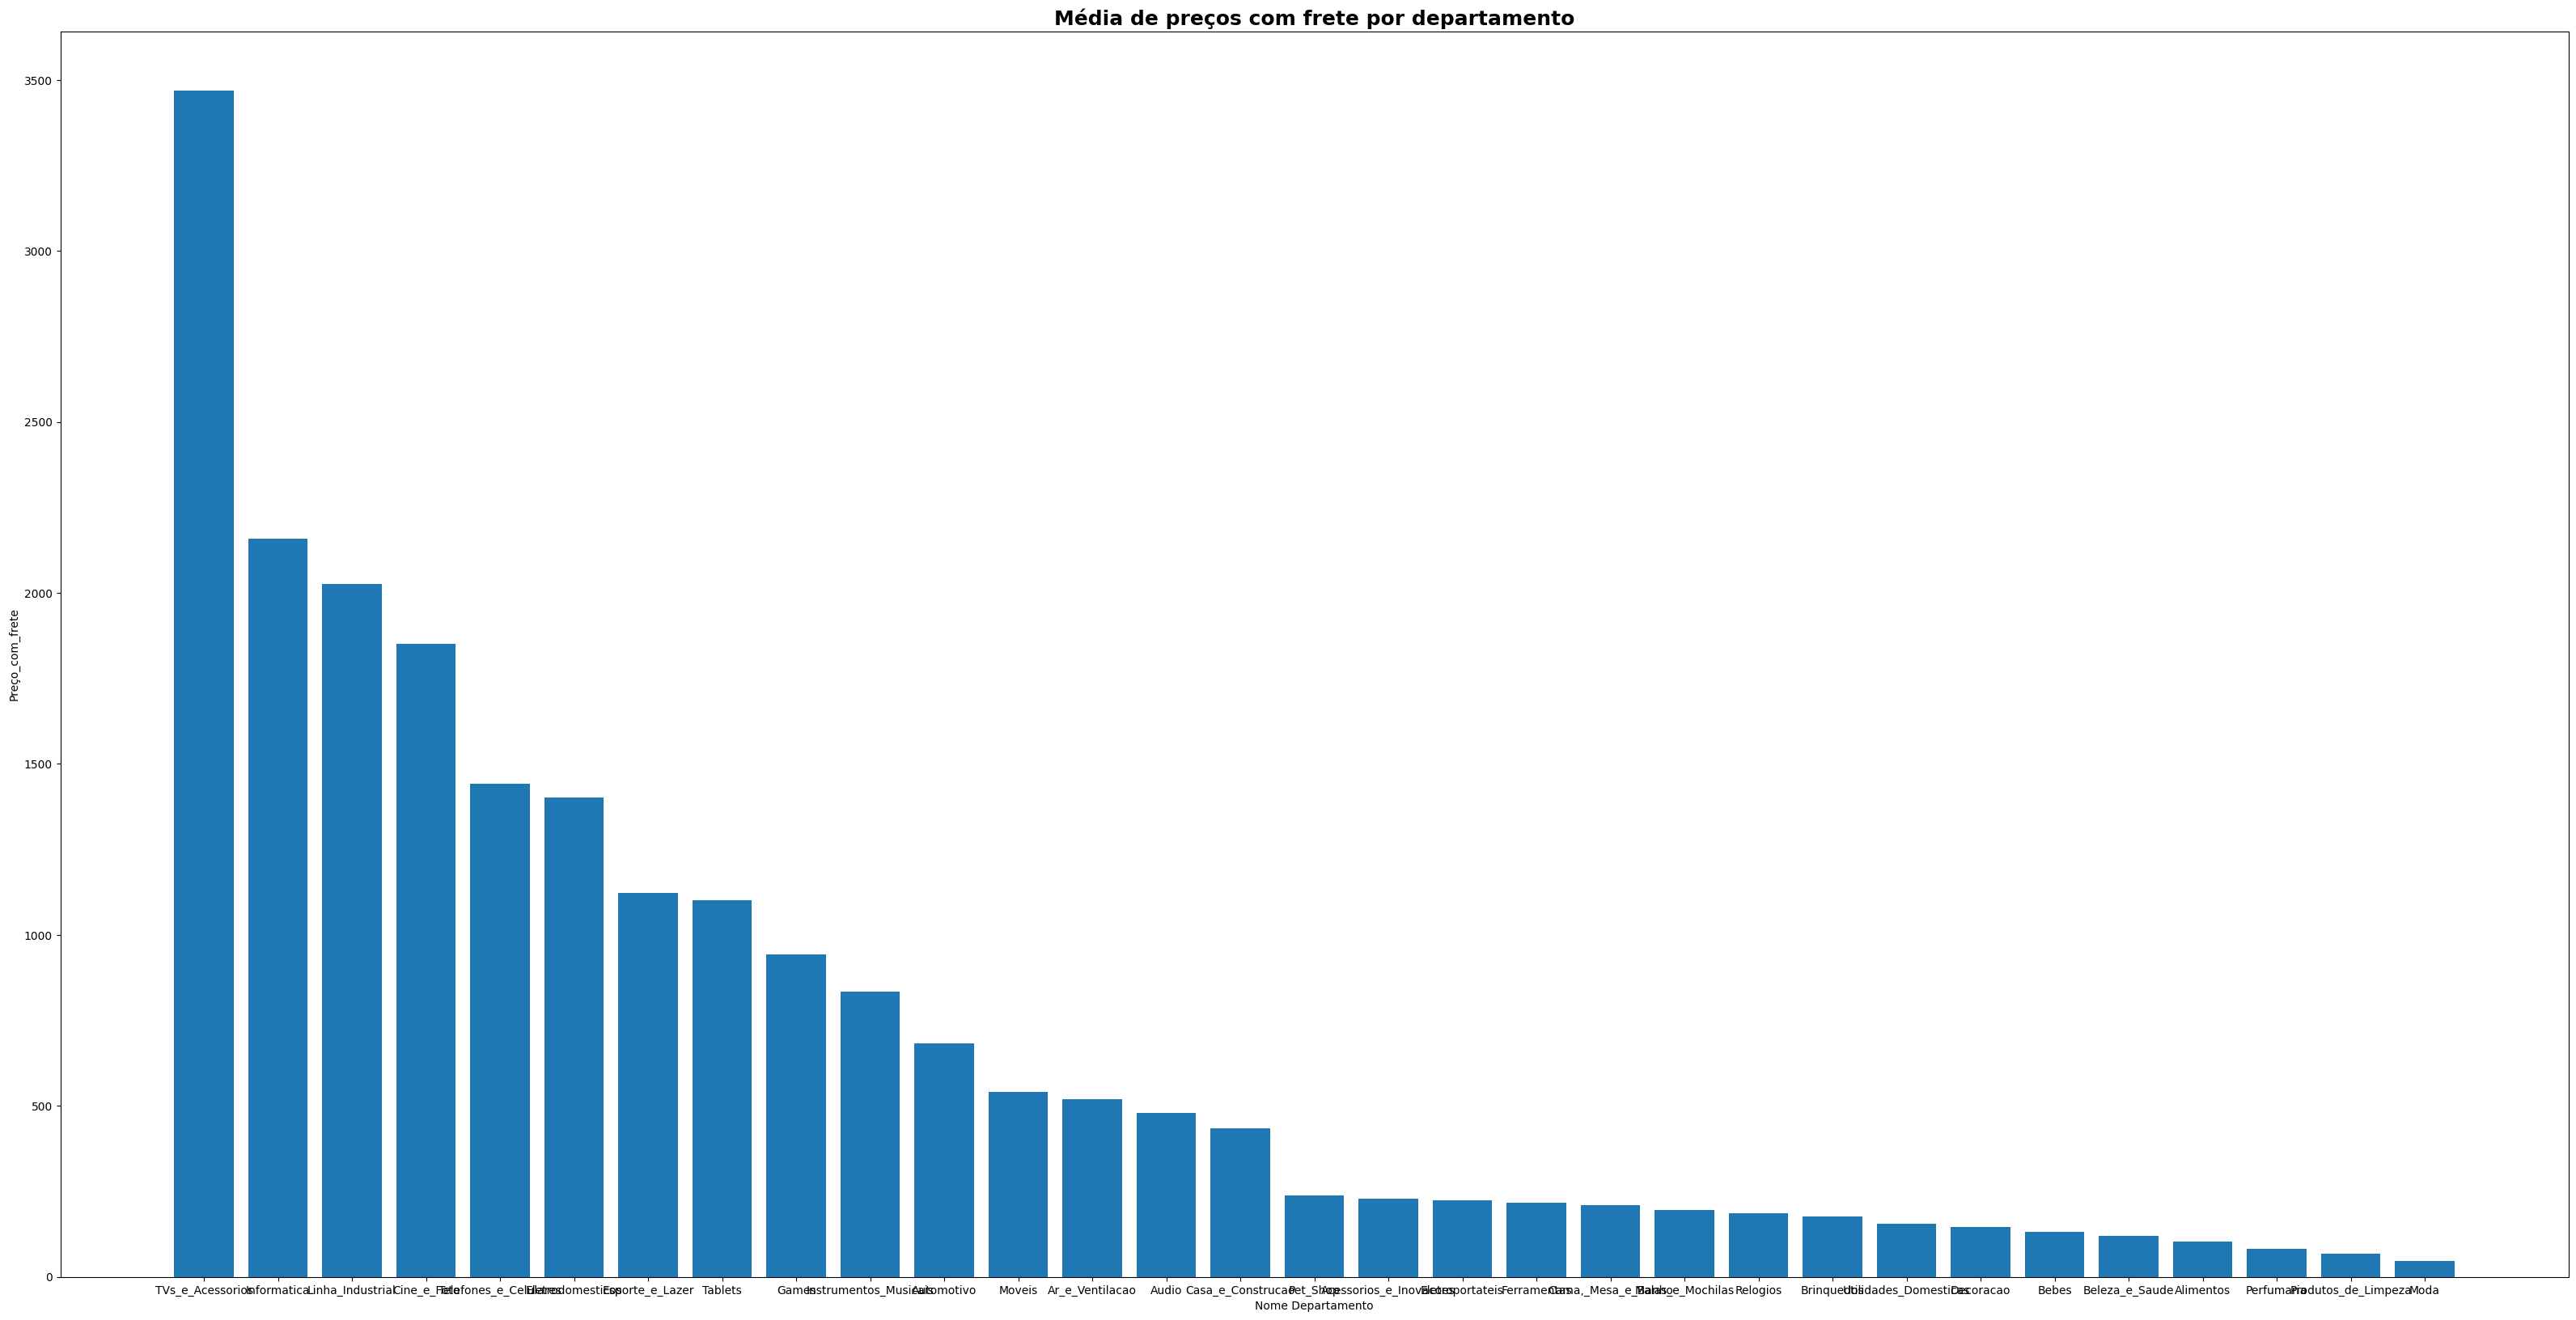

In [41]:
# Média de preço com frete por departamento
fig = plt.figure(figsize=(40, 20))

plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco[
    "Preço_com_frete"])

plt.xlabel("Nome Departamento")
plt.ylabel("Preço_com_frete")

plt.title("Média de preços com frete por departamento", loc="center",
          fontsize=18, fontweight="bold", color="black");


In [42]:
# Gráfico de barras com plotly - Média de idade por bandeira
px.bar(agg_bandeira_idade, x="bandeira", y="idade")


In [43]:
# Gráfico de linhas plotly - Compras por período
px.line(venda_por_data, x="Data", y="idcompra")


In [45]:
# Gráfico de barras plotly - Média de preço com frete por departamento
px.bar(agg_dept_preco, x="Nome_Departamento", y="Preço_com_frete")
